In [1]:
# 불필요한 경고 메시지 삭제
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

## 결정 트리 모델 생성

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Graphviz 시각화
- 트리 모델이 어떻게 훈련했는지 시각화

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
  dt_clf, # 시각화 할 모델
  out_file='tree.dot', # 시각화 결과물을 저장할 파일 경로
  class_names = iris_data.target_names, # 문자열로 된 클래스들의 이름
  feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
  impurity=True,
  filled=True
)

In [11]:
import graphviz

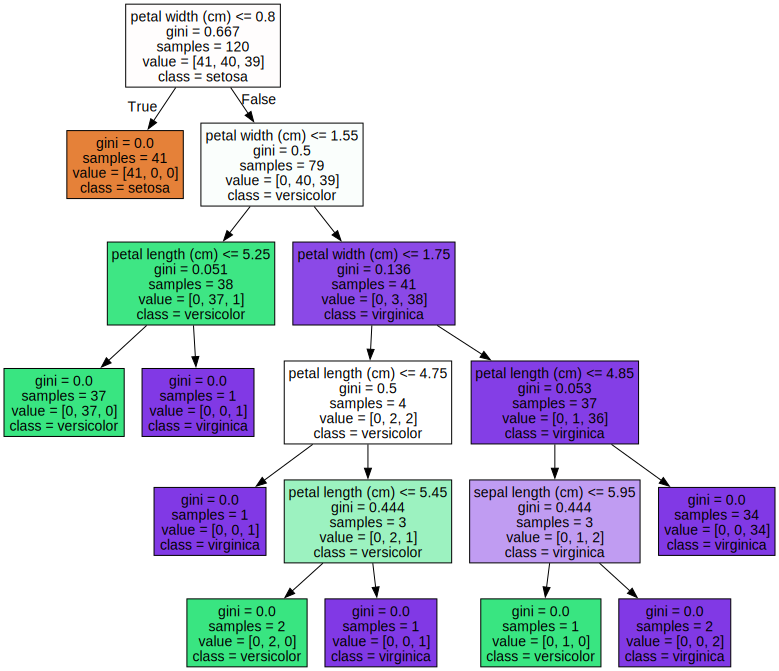

In [12]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

## 정확도 확인

In [13]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred = dt_clf.predict(X_test)   # 새로 보는 데이터에 대한 예측

print('훈련 세트에 대한 점수 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 세트에 대한 점수 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 1.000
테스트 세트에 대한 점수 : 0.867


### max_depth를 이용한 질문의 깊이 제어

In [14]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

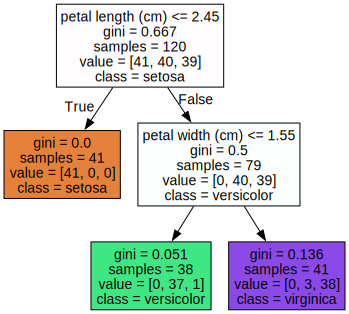

In [15]:
export_graphviz(
  dt_clf_depth_2,  # 시각화 할 모델
  out_file='tree.dot',
  class_names = iris_data.target_names,
  feature_names = iris_data.feature_names,
  impurity=True,
  filled=True
)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [16]:
train_pred = dt_clf_depth_2.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred = dt_clf_depth_2.predict(X_test)   # 새로 보는 데이터에 대한 예측

print('훈련 세트에 대한 점수 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 세트에 대한 점수 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 0.967
테스트 세트에 대한 점수 : 0.867


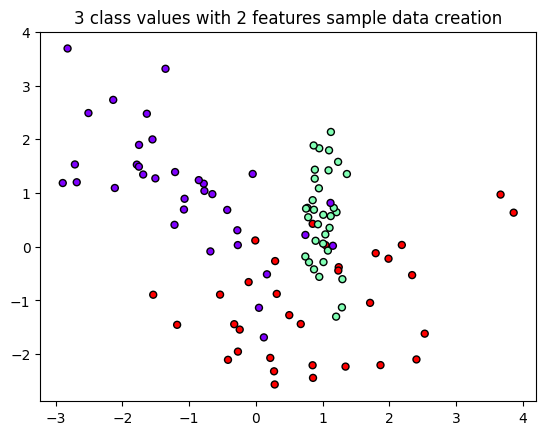

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 class values with 2 features sample data creation')

# 2차원 시각화를 위해 feature 2개, 결정값 클래스 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(
  n_features=2,
  n_redundant=0, 
  n_informative=2,
  n_classes=3,
  n_clusters_per_class=1,
  random_state=0
)

# plot 형태로 feature 2개로 2차원 좌표 시각화, 각 클래스값는 다른 색깔 가짐
plt.scatter(
  X_features[:, 0],
  X_features[:, 1],
  marker='o',
  c=y_labels,
  s=25,
  cmap='rainbow',
  edgecolor='k'
)
plt.show()

In [18]:
import numpy as np

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
  fig,ax = plt.subplots()

  # 학습 데이터 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
             clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 training 데이터로 model 학습
  model.fit(X, y)
  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contourf() 를 이용해 class boundary를 visualization 수행
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap='rainbow', clim=(y.min(), y.max()),
                         zorder=1)

### 기본 결정 트리 확인

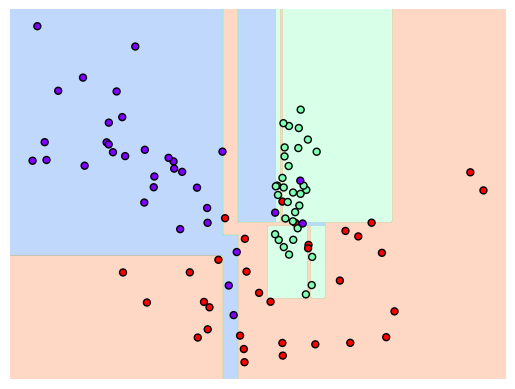

In [19]:
from sklearn.tree import DecisionTreeClassifier

# 하이퍼 파라미터를 이용해 복잡도 조절하지 않은 의사결정나무 모델은 항상 과대적합
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

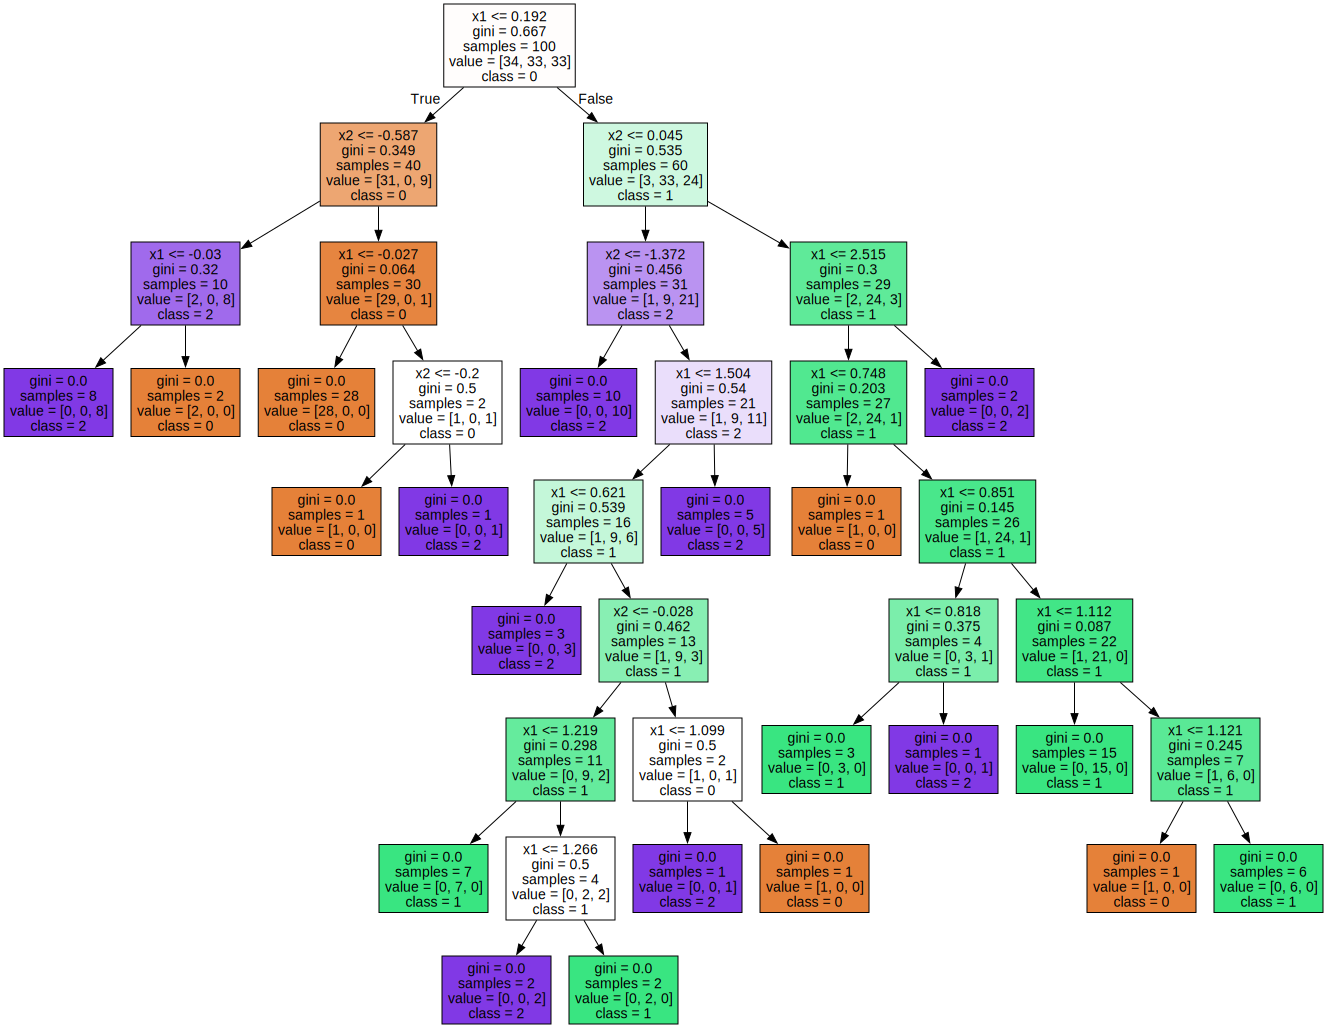

In [20]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=['0', '1', '2'], feature_names=['x1', 'x2'], impurity=True, filled=True)

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 jupyter notebook 상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

### max_depth 조절

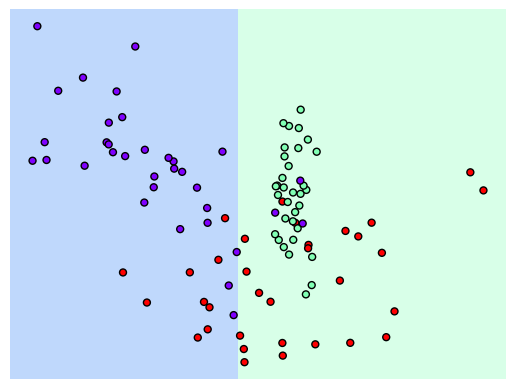

In [21]:
# 나무 최대 깊이를 1로 설정
dt_clf = DecisionTreeClassifier(max_depth=1).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

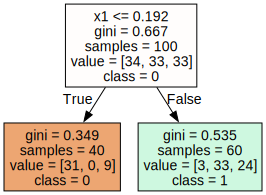

In [22]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=['0', '1', '2'], feature_names=['x1', 'x2'], impurity=True, filled=True)
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

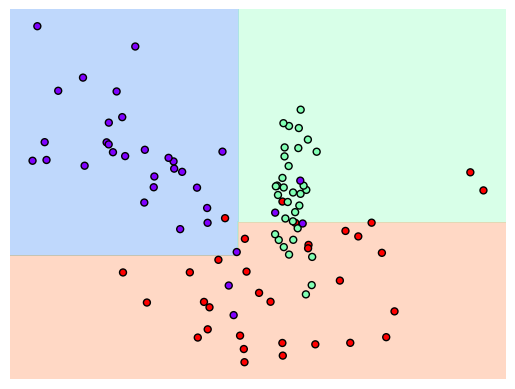

In [23]:
# 나무 최대 깊이 = 2
dt_clf = DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 특성 중요도
- 어느 특성이 노드의 균일함에 많이 기여 했는가

In [24]:
dt_clf_iris = DecisionTreeClassifier().fit(X_train, y_train)
dt_clf_iris.feature_importances_

array([0.00833507, 0.01667014, 0.55490281, 0.42009198])

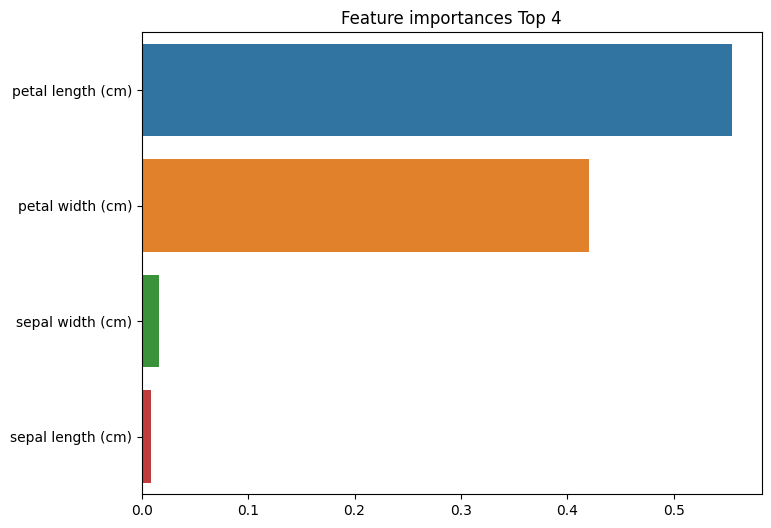

In [26]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_value = model.feature_importances_

  # Top 중요도로 정렬을 쉽게 하고, 사본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 series 변환
  ftr_importances = pd.Series(ftr_importances_value, index=columns)
  # 중요도 값 순으로 series 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top, y=ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)